# Assignment 2 - Elena Jarrett 

Student ID No: 210003508

Module Code: GG3209 

Due Date: 23/10/2023

GitHub: https://github.com/ejarrettt/Assignment_2

## Part 1: Python Basics

In [1]:
#Import math module and use 'm' for quick reference in the code. 
import math as m

### Task 1: Create and If...Else statement that tests if a number is divisible by three. 

I created a list of numbers, and ran a for loop on the variables, using modulo to check if they are divisible by three. If the remainder is equal to 0, it is divisible by three.

In [2]:
lst1 = [1,2,3,13,14,15]

for x in lst1:   
    if x % 3 == 0: 
        print (f"{x} is divisible by 3.")
    else: 
        print (f"{x} is not divisible by 3.")

1 is not divisible by 3.
2 is not divisible by 3.
3 is divisible by 3.
13 is not divisible by 3.
14 is not divisible by 3.
15 is divisible by 3.


### Task 2: Create an If...Else statement that will test if a type of fruit is in a list of acceptable fruits. 

I created a list of acceptable fruits and set 'x' to represent a type of fruit. The if...else statement determined if 'x' is in the list of fruits. 

In [3]:
fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]

x = "apple"
if x in fruits: 
    print (f"{x} is acceptable.")
else:
    print (f"{x} is not acceptable.")

x = "mango"
if x in fruits: 
    print (f"{x} is acceptable.")
else:
    print (f"{x} is not acceptable.")

apple is acceptable.
mango is not acceptable.


### Task 3: Create a function to calculate the distance between two coordinates using the haversine formula. 

Using the math module, I converted the latitude and longitude from degrees to radians, then compute the differences in these values, and then applied the Haversine formula to calculate the distance between two coordinates.

In [4]:
def haversine(coord1, corrd2):
    #Mean Radius of Earth in km
    r = 6371
    
    #Convert latitude and longitude from degrees to radians
    lat1, lon1 = map(m.radians, coord1)
    lat2, lon2 = map(m.radians, coord2)
    
    #Calculate the difference in latitude and longitude. 
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    #Apply the Haversine formula 
    a = m.sin(dlat / 2) ** 2 + m.cos(lat1) * m.cos(lat2) * m.sin(dlon / 2) ** 2
    c = 2 * m.atan2(m.sqrt(a), m.sqrt(1-a))
    
    # Calculate the distance. 
    return c * r
    
# Test the function with two coordinates 
coord1 = [51.509865, -0.118092] # London 
coord2 = [56.3387, -2.7990] # St Andrews

distance = haversine(coord1, coord2)

print(f"Distance = {distance} km")

Distance = 564.7970107333985 km


## Part 2: Pandas and NumPy

### Data preperation 

In [5]:
#Import Libraries, use 'pd' and 'np' for quick reference in the code later. 
import pandas as pd
import numpy as nd

In [6]:
#Read and name the Data 
trees = pd.read_csv('/arcgis/home/Assignment_2_data/portland_park_trees.csv', header=0)
trees.head(5)

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."
3,4,429,2017/05/09,QURU,10.3,Poor,28.0,38.0,31.0,staff,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
4,5,430,2017/05/09,PSME,33.2,Fair,102.0,43.0,44.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


### Question 1: How many trees are of the Quercus or Acer genus? 

I created a new DataFrame by filtering the 'trees' DataFrame to include only rows with 'Genus' values "Guercus" and "Acer". This is done using a boolean series and the '+' operator to combine them. I then calculated the total number of rows in the new DataFrame using 'len()'. 

In [7]:
quercus_or_acer = trees[(trees['Genus']=="Quercus") + (trees["Genus"]=="Acer")]
count_trees = len(quercus_or_acer)
print(f"Number of trees of the Quercus or Acer genus: {count_trees}")

Number of trees of the Quercus or Acer genus: 5675


### Question 2: How many trees of the Quercus or Acer genus have a DBH larger than 50 inches? 

I created a new DataFrame which only included rows where 'Genus' is either "Quercus" and "Acer" and have a DBH greater than 50 inches. 

In [8]:
large_quercus_or_acer = trees[(trees["Genus"]=="Quercus") | (trees["Genus"]=="Acer") & (trees["DBH"]>50)]
print(f"Number of trees of the Quercus or Acer genus with a DBH larger than 50 inches: {len(large_quercus_or_acer)}")

Number of trees of the Quercus or Acer genus with a DBH larger than 50 inches: 2133


### Question 3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

I filtered the 'trees' DataFrame to only include the three specified genera. I then grouped the filtered DataFrame by the 'Genus' column to calculate the mean DBH for each genera. The genus with the highest mean DBH was identitifed using the maximum value. 

In [9]:
genera = trees[trees['Genus'].isin(['Quercus', 'Acer', 'Fraxinus'])]

mean_dbh_genus = genera.groupby('Genus')['DBH'].mean()
print(mean_dbh_genus)

genus_highest_mean_dbh = mean_dbh_genus.idxmax()
highest_mean_dbh = mean_dbh_genus.max()

print(f"The genus with the highest mean DBH is {genus_highest_mean_dbh} with a mean DBH of {highest_mean_dbh} inches.")

Genus
Acer        18.419085
Fraxinus    11.033610
Quercus     23.568238
Name: DBH, dtype: float64
The genus with the highest mean DBH is Quercus with a mean DBH of 23.56823839157492 inches.


### Question 4: How many different species of trees are recoeded in the Acer genus? 

I created a filtered DataFRame which only include rows where the 'Genus' column has 'Acer' value. Using nunique() on the 'genus_spec' column of the 'acer_genus' DataFrame to count the unique species in the Acer genus. 

In [10]:
acer_genus = trees[trees['Genus'] == 'Acer']

unique_species_acer = acer_genus['Genus_spec'].nunique()

print(f"There are {unique_species_acer} different species of trees recorded in the Acer genus.")

There are 20 different species of trees recorded in the Acer genus.


### Question 5: 

- Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column.
- Remove the original "pop" column.
- Choose/subset a city that starts with the same letter as your first name (my first name starts with "E").
- Subset the five biggest (i.e., largest population sizes) cities from the country where your selected city is.
- Print the result.
- Make sure you write the scripts in different code cells where you describe the process.

In [11]:
#Read and explore the data. 
world_cities = pd.read_csv ('/arcgis/home/Assignment_2_data/world_cities.csv', header=0)
world_cities.head(5)

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0


I created a "pop_M" column, converting the population figures into millions, using '/1e6'. 

In [12]:
print("Adding a new coloumn for the population in millions, named pop_M, using the existing pop column.")
world_cities['pop_M'] = world_cities['pop'] / 1e6
world_cities.head(5)

Adding a new coloumn for the population in millions, named pop_M, using the existing pop column.


,city,country,pop,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0,0.021817
4,'Abud,Palestine,2456,32.03,35.07,0,0.002456


I deleted the original "pop" column using DEL function. 

In [13]:
print("Deleting the pop column using DEL fucntion")
del world_cities['pop']
world_cities.head(5)

Deleting the pop column using DEL fucntion


,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456


I filtered the 'world_cities' DataFrame to include only the rows where the values in the 'city' column start with the letter E.

In [14]:
city_with_e = world_cities[world_cities['city'].str.startswith('E')]
print(city_with_e)

                 city       country    lat     lon  capital     pop_M
10083           Eagan           USA  44.82  -93.16        0  0.064393
10084    Eaglescliffe            UK  54.53   -1.35        0  0.018830
10085       Easington       Jamaica  17.92  -76.60        0  0.002645
10086      East Angus        Canada  45.48  -71.67        0  0.003647
10087  East Broughton        Canada  46.22  -71.08        0  0.002414
...               ...           ...    ...     ...      ...       ...
11078           Ezhou         China  30.40  114.83        0  0.196180
11079       Ezibeleni  South Africa -31.87   26.98        0  0.020026
11080           Ezine        Turkey  39.79   26.33        0  0.016036
11081            Ezza       Nigeria   6.45    8.08        0  0.069298
11082        Ezzangbo       Nigeria   6.40    7.97        0  0.008020

[1000 rows x 6 columns]


I chose the city Eagan, which is in the USA. Therefore, I created a new DataFrame which only contained rows where the column 'country' waas the USA. Then I used the 'nlargest()' function to find the top 5 rows with the largest values in the 'pop_M' column and printed the results. 

In [15]:
print("Subsetting the Five Largest Cities, based on Eagan's country, the USA.")

us_cities = world_cities[world_cities["country"] == "USA"]
us_cities.nlargest(5, 'pop_M')

Subsetting the Five Largest Cities, based on Eagan's country, the USA.


,city,country,lat,lon,capital,pop_M
25877,New York,USA,40.67,-73.94,0,8.124427
21435,Los Angeles,USA,34.11,-118.41,0,3.911500
7366,Chicago,USA,41.84,-87.68,0,2.830144
14769,Houston,USA,29.77,-95.39,0,2.043005
28856,Phoenix,USA,33.54,-112.07,0,1.450884


## Part 3: Python Data Visualization 

### Data preparation. 

In [16]:
#Import libraries and modules, use 'pd', 'sns' and 'plt' for quick reference in the code later. 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Set the default plot size.
plt.rcParams['figure.figsize'] = [10, 8] 

In [17]:
#Read and name the dataset. 
trees = pd.read_csv('/arcgis/home/Assignment_2_data/portland_park_trees.csv', header=0)

#Remove any spaces in the column names using list comprehension.
trees.columns =[column.replace(" ", "_") for column in trees.columns]
trees.tail(5)

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
25529,25530,726046,2018/08/16,QURU,31.6,Fair,74.0,50.0,46.0,volunteer,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
25530,25531,726443,2019/10/11,PSME,0.4,Good,8.0,6.0,6.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
25531,25532,726444,2019/10/11,MEGL,26.3,Fair,79.0,30.0,40.0,staff,...,Metasequoia,dawn redwood,Metasequoia glyptostroboides,CD,L,No,NaN,NaN,Asia - central China,"A deciduous conifer, dawn redwood is Oregon's ..."
25532,25533,726445,2019/10/11,PCSI,8.8,Fair,43.0,20.0,20.0,staff,...,Picea,Sitka spruce,Picea sitchensis,CE,L,Yes,NaN,NaN,North America - Alaska south to British Columb...,"Green, 1"" long, typically flat needles are the..."
25533,25534,726446,2019/10/11,COKO,2.0,Good,18.0,13.0,13.0,staff,...,Cornus,kousa dogwood,Cornus kousa,BD,S,No,NaN,NaN,"Asia - Japan, Korea",A 20-30' tree with showy white flower bracts t...


### Graph 1:  Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis. 

I created a new DataFrame which only included the rows where the value in the 'Genus' column is 'Ulmus' and displayed a scatterplot. 

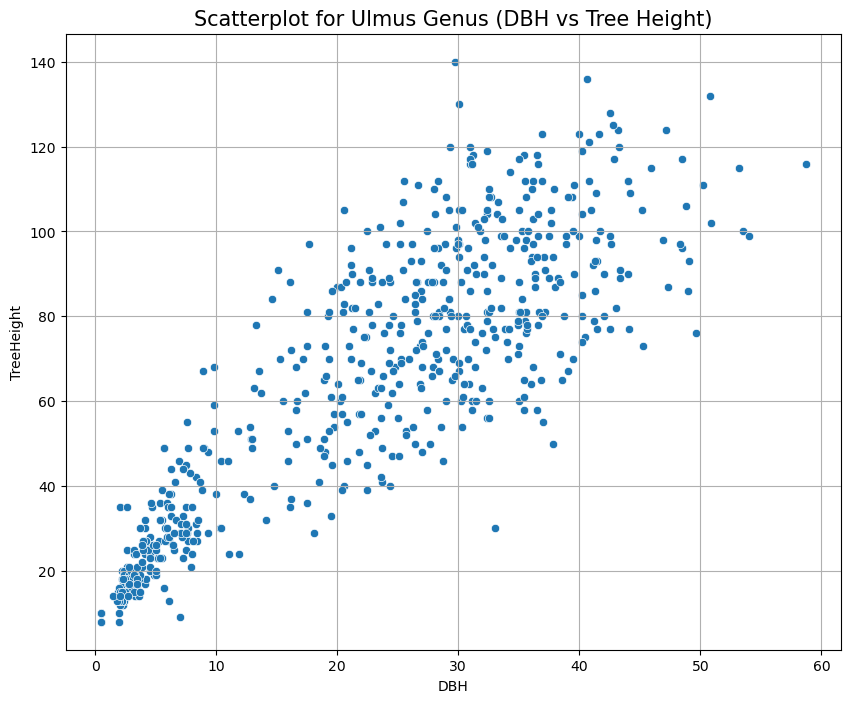

In [18]:
ulmus = trees[trees['Genus'] == 'Ulmus']

fig1, axs = plt.subplots (1,1)
sns.scatterplot(ax=axs, x='DBH', y='TreeHeight', data=ulmus) #Set 'DBH' on x-axis and 'TreeHeight' on y-axis. 
plt.title('Scatterplot for Ulmus Genus (DBH vs Tree Height)', fontsize=15, color="#000000") #Title and styling.
axs.grid(True) #Include grid. 
plt.show()

### Graph 2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue. 

I created a scatterplot using the previously created 'ulmus' DataFrame. 

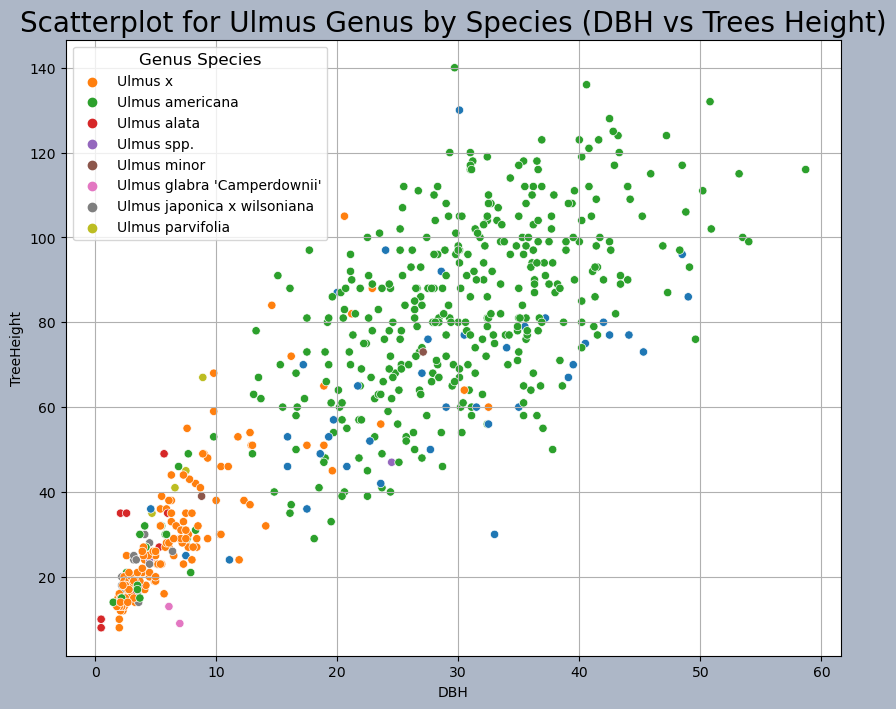

In [19]:
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x='DBH', y='TreeHeight', hue='Genus_spec', data=ulmus) #Set 'DBH' on x-axis and 'TreeHeight' on y-axis, with 'Genus_spec' as hue. 
axs.set_title("Scatterplot for Ulmus Genus by Species (DBH vs Trees Height)", fontsize=20, color="#000000") #Title and styling.
handles, labels = axs.get_legend_handles_labels() #Customise legend. 
axs.legend(handles=handles[1:], labels=labels[1:], title="Genus Species", title_fontsize=12) 
axs.grid(True) #Include grid
fig.patch.set_facecolor('#adb7c7') #Set background colour. 
plt.show(fig)

### Graph 3: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot).

I created and displayed a boxplot of DBH for Ulmus genus differentiated by species, each species has its own boxplot using the previously created 'ulmus' DataFrame. 

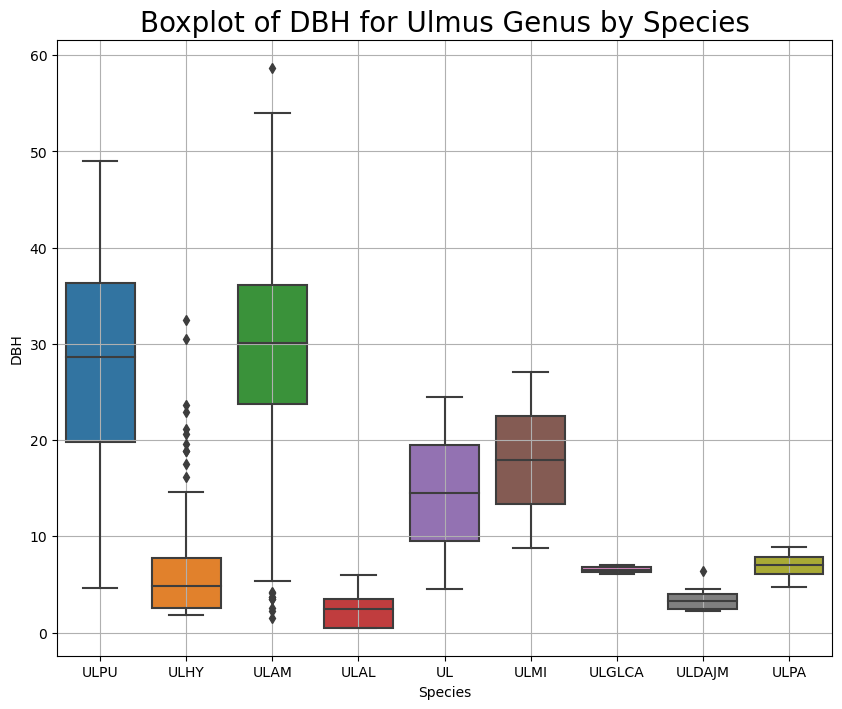

In [20]:
fig, axs = plt.subplots(1, 1)
sns.boxplot(ax=axs, data=ulmus, x='Species', y='DBH') #Set 'DBH' on y-axis and 'Species' on x-axis. 
plt.title('Boxplot of DBH for Ulmus Genus by Species', fontsize=20, color="#000000") #Title and styling.
axs.grid(True) #Add a grid. 
plt.show()

### Graph 4: Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs.

I created a subplot with a specific layout and size and plotted a scatteplot (graph 1) and boxplot (graph 2) on this without legends.  

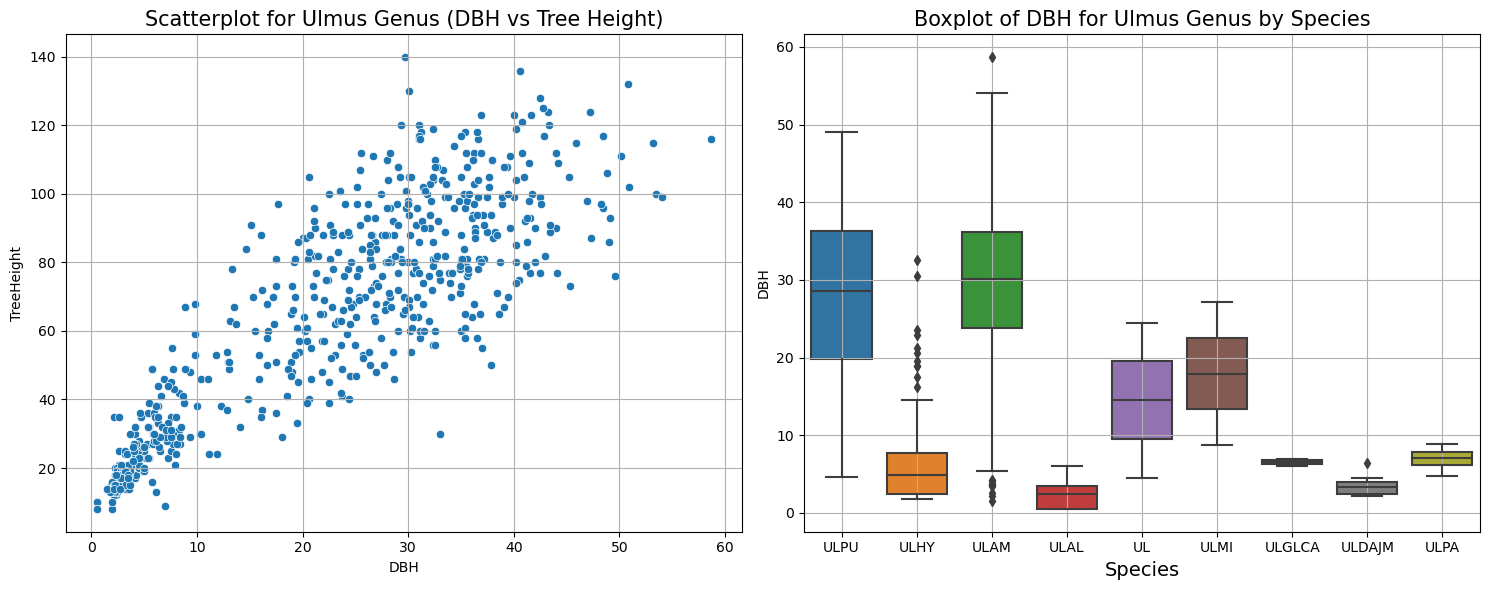

In [21]:
fig, axs = plt.subplots(1,2, figsize = (15,6)) 

sns.scatterplot(ax=axs[0], data=ulmus, x='DBH', y='TreeHeight') #Plot in first column with 'DBH' on x-axis and 'TreeHeight' on y-axis. 
axs[0].set_title('Scatterplot for Ulmus Genus (DBH vs Tree Height)', fontsize=15, color="#000000") #Title and styling.
axs[0].grid(True) #Add a grid. 

sns.boxplot(ax=axs[1], data=ulmus, x='Species', y='DBH') #Plot in second column with 'DBH' on y-axis and 'Species' on x-axis. 
axs[1].set_title('Boxplot of DBH for Ulmus Genus by Species', fontsize=15, color="#000000")
axs[1].set_xlabel("Species", fontsize=14)
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Part 4: Python GeoPandas

Chosen spatial data from the Spatial Data Portal of Scotland: Site of Special Scientific Interest (Scotland). 

### Import  libraries. 

In [22]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyproj from https://files.pythonhosted.org/packages/97/0a/b1525be9680369cc06dd288e12c59d24d5798b4afcdcf1b0915836e1caa6/pyproj-3.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/83/35/562e72099bf50228fa2a8e161db35a94090f3939cb73aa54e385096ca3ff/contextily-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351

In [23]:
#Import libraries with short names for quick reference in the code later. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot
import warnings
warnings.filterwarnings('ignore')

#Set the defult plot size. 
plt.rcParams['figure.figsize'] = [10, 8]

### Task 1: Read the dataset(shapefile) you download as GeoPandas DataFrame

First I downloaded the dataset, and read this polygon layer about Sites of Special Scientific Interest (Scotland) as a DataFrame using GeoPandas. 

<AxesSubplot: >

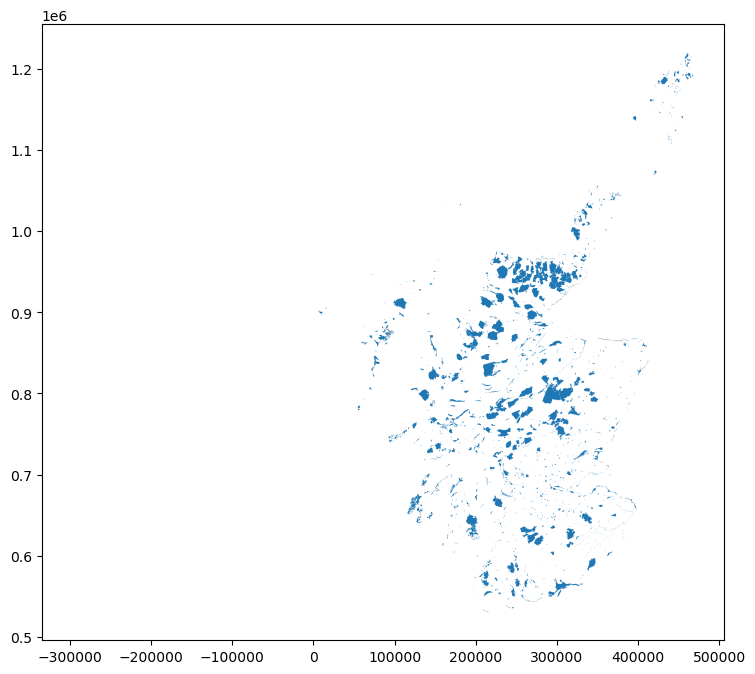

In [24]:
gdf = gpd.read_file('/arcgis/home/Assignment_2_data/SSSI_SCOTLAND.shp')
gdf.plot()

### Task 2: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

I plotted the first 5 and last 5 records in the selected data set using '.plot(). The plot for the last 5 sets of records appears blank, this is likely due to the first 4 records having very small areas, as well as these being far away from the final record, as seen in the table. 

<AxesSubplot: >

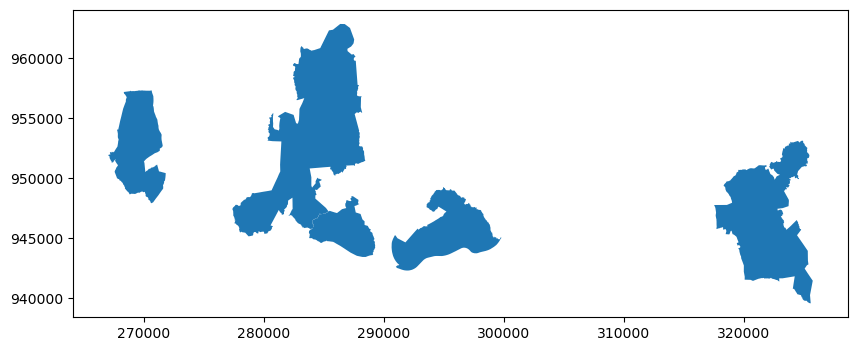

In [25]:
#Plot the first 5 sets of records. 
gdf.head(5).plot()

<AxesSubplot: >

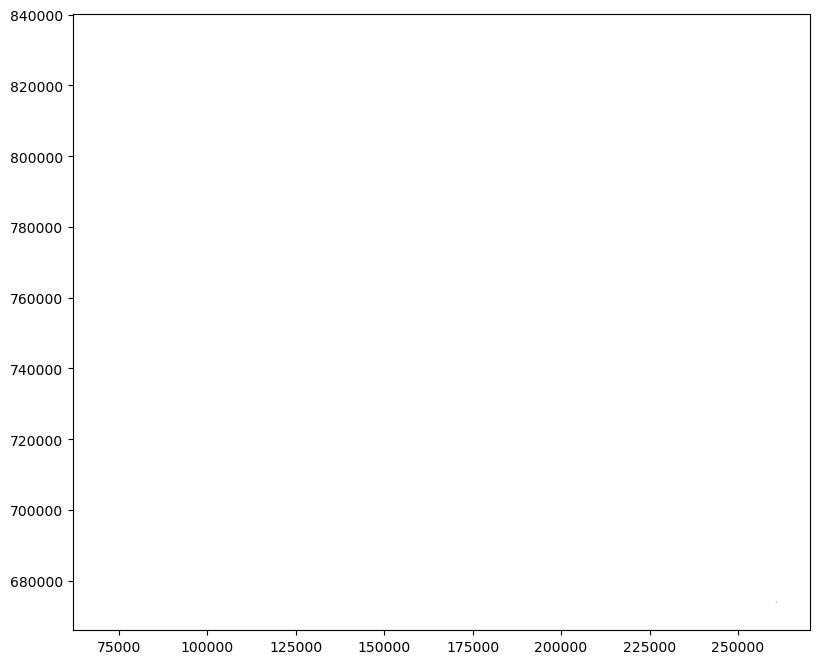

In [26]:
#Plot the last 5 sets of records. 
gdf.tail(5).plot()

In [27]:
gdf.tail(5)

,NAME,PA_CODE,STATUS,EUROPEAN_C,TYPE,SITE_HA,FEATURE_HA,UPDATED,MPA_NETWOR,GEOGRAPHIC,Shape_Leng,Shape_Area,geometry
15872,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.00,2013-12-06,N,MIXED,10.880919,7.480690,"POLYGON ((71527.243 829416.082, 71528.543 8294..."
15873,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.00,2013-12-06,N,MIXED,17.441604,17.723200,"POLYGON ((72801.193 832175.162, 72802.693 8321..."
15874,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.00,2013-12-06,N,MIXED,24.413721,32.783548,"POLYGON ((72870.194 832178.261, 72868.794 8321..."
15875,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.00,2013-12-06,N,MIXED,28.484775,39.996448,"POLYGON ((72805.193 832184.761, 72806.593 8321..."
15876,Bargeny Hill,10496,Current,None,BIOLOGICAL,5.48,5.48,2022-11-16,N,TERRESTRIAL,1019.566848,54751.875214,"POLYGON ((260737.100 674190.380, 260739.408 67..."


<AxesSubplot: >

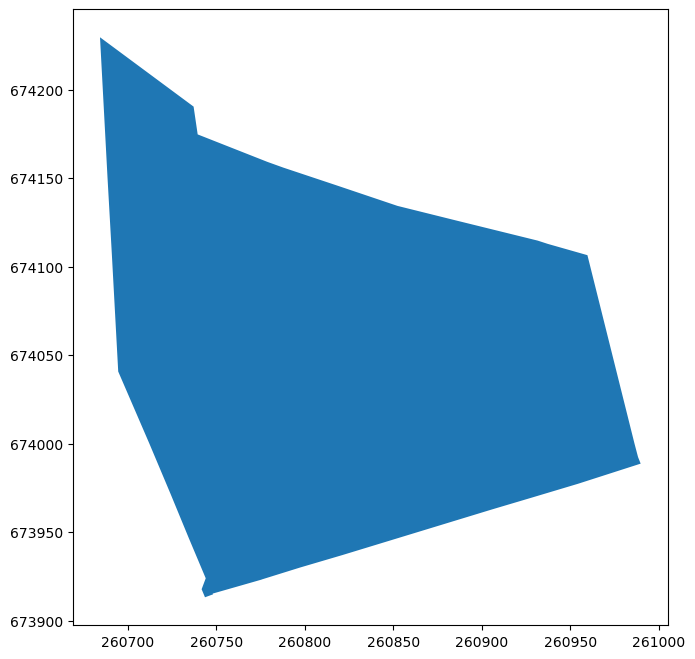

In [28]:
#Due to the error in plotting the last 5 sets of records, the last 1 record does plot. 
gdf.tail(1).plot()

### Task 3: Create a map where you can explore the selected dataset.

I created an interactive map using '.explore' from the GeoDataFrame, by catergorically colouring features based on 'GEOGRAPHIC' column (a catergorical variable) using the 'RdYlBu' colourmap with tooltips for detailed infomation.

In [67]:
gdf.explore(column='GEOGRAPHIC', cmap='RdYlBu')

KeyError: 'GEOGRAPHIC'

### Task 4: What is the Coordinate Reference System of the selected dataset?

I used '.crs' to explore the projection infomation. ESPG: 27700 is the projected reference system, it is a British National Grid. The geographic coordinate system is WGS84. The easting and northing measurements are reported in meters. The area of use of the coordinate system is also defined.

In [80]:
crs = gdf.crs 
print(f"The CRS of the dataset is: {crs}")

The CRS of the dataset is: epsg:27700


In [81]:
gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

### Task 5: How many features does the selected dataset contain?

Using the 'len()' function I caclulated the number of features in the dataset. 

In [82]:
num_features = len(gdf)
print(f"The selected dataset contains {num_features} features.")

The selected dataset contains 15877 features.


### Task 6: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

I first considered which attributes were categorical. I defined a sub-setting filter where the 'TYPE' column has the value 'BIOLOGICAL'. I then plotted the results to visualise the new DataFrame.

In [83]:
print(gdf.dtypes)

NAME            object
PA_CODE          int64
STATUS          object
EUROPEAN_C      object
TYPE            object
SITE_HA        float64
FEATURE_HA     float64
UPDATED         object
MPA_NETWOR      object
GEOGRAPHIC      object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object


In [84]:
filtered_gdf = gdf[gdf['TYPE'] == 'BIOLOGICAL']
filtered_gdf

,NAME,PA_CODE,STATUS,EUROPEAN_C,TYPE,SITE_HA,FEATURE_HA,UPDATED,MPA_NETWOR,GEOGRAPHIC,Shape_Leng,Shape_Area,geometry
0,Shielton Peatlands,1426,Current,136090,BIOLOGICAL,5631.97,5631.97,2022-03-30,N,TERRESTRIAL,55952.394321,5.631974e+07,"POLYGON ((324863.520 953118.820, 324869.450 95..."
1,Forsinard Bogs,651,Current,136199,BIOLOGICAL,1509.19,1509.19,2015-12-30,N,TERRESTRIAL,20762.756650,1.509189e+07,"POLYGON ((287452.440 948475.813, 287452.451 94..."
2,Sletill Peatlands,1443,Current,135069,BIOLOGICAL,2985.46,2985.46,2015-12-30,N,TERRESTRIAL,34347.501618,2.985464e+07,"POLYGON ((294984.060 949248.560, 294985.080 94..."
3,West Strathnaver,1611,Current,135128,BIOLOGICAL,2735.17,2735.17,2017-06-30,N,TERRESTRIAL,29538.316830,2.735172e+07,"POLYGON ((270659.750 957299.125, 270675.000 95..."
4,West Halladale,1607,Current,136029,BIOLOGICAL,8658.85,8658.85,2022-03-31,N,TERRESTRIAL,78524.597048,8.658848e+07,"POLYGON ((286752.498 962835.756, 287189.592 96..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15872,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.00,2013-12-06,N,MIXED,10.880919,7.480690e+00,"POLYGON ((71527.243 829416.082, 71528.543 8294..."
15873,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.00,2013-12-06,N,MIXED,17.441604,1.772320e+01,"POLYGON ((72801.193 832175.162, 72802.693 8321..."
15874,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.00,2013-12-06,N,MIXED,24.413721,3.278355e+01,"POLYGON ((72870.194 832178.261, 72868.794 8321..."
15875,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.00,2013-12-06,N,MIXED,28.484775,3.999645e+01,"POLYGON ((72805.193 832184.761, 72806.593 8321..."


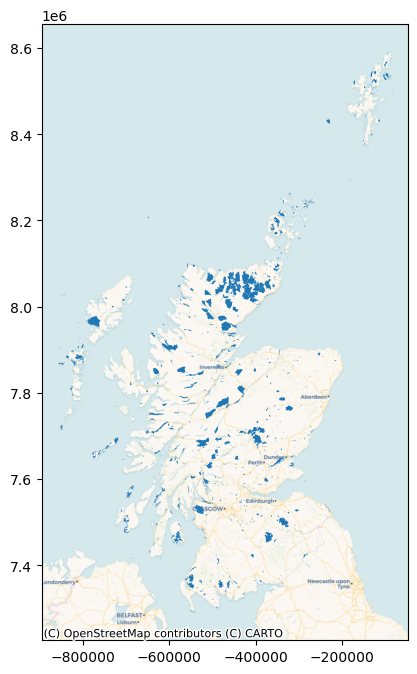

In [85]:
#Convert the CRS to ESPG:3857, making it compatable with online map visualisation tools and add a basemap to the geographic plots.
simd_cWebM = filtered_gdf.to_crs("EPSG:3857")
simd_map = simd_cWebM.plot()
ctx.add_basemap(simd_map, source=ctx.providers.CartoDB.Voyager)

### Task 7: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute.

I created a new GeoPandas DataFrame which has been filtered for rows where 'Shape_area' is more than 100 and plotted the new DataFrame to visualise the results. 

In [86]:
filtered_gdf2 = gdf[gdf['Shape_Area'] > 100]
filtered_gdf2

,NAME,PA_CODE,STATUS,EUROPEAN_C,TYPE,SITE_HA,FEATURE_HA,UPDATED,MPA_NETWOR,GEOGRAPHIC,Shape_Leng,Shape_Area,geometry
0,Shielton Peatlands,1426,Current,136090,BIOLOGICAL,5631.97,5631.97,2022-03-30,N,TERRESTRIAL,55952.394321,5.631974e+07,"POLYGON ((324863.520 953118.820, 324869.450 95..."
1,Forsinard Bogs,651,Current,136199,BIOLOGICAL,1509.19,1509.19,2015-12-30,N,TERRESTRIAL,20762.756650,1.509189e+07,"POLYGON ((287452.440 948475.813, 287452.451 94..."
2,Sletill Peatlands,1443,Current,135069,BIOLOGICAL,2985.46,2985.46,2015-12-30,N,TERRESTRIAL,34347.501618,2.985464e+07,"POLYGON ((294984.060 949248.560, 294985.080 94..."
3,West Strathnaver,1611,Current,135128,BIOLOGICAL,2735.17,2735.17,2017-06-30,N,TERRESTRIAL,29538.316830,2.735172e+07,"POLYGON ((270659.750 957299.125, 270675.000 95..."
4,West Halladale,1607,Current,136029,BIOLOGICAL,8658.85,8658.85,2022-03-31,N,TERRESTRIAL,78524.597048,8.658848e+07,"POLYGON ((286752.498 962835.756, 287189.592 96..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15852,Monach Isles,1178,Current,136041,BIOLOGICAL,600.07,0.04,2013-12-06,N,MIXED,76.850796,3.552527e+02,"POLYGON ((59098.501 862896.999, 59104.002 8628..."
15853,Monach Isles,1178,Current,136041,BIOLOGICAL,600.07,0.38,2013-12-06,N,MIXED,329.753595,3.797904e+03,"POLYGON ((60411.001 862985.499, 60413.501 8629..."
15854,Monifieth Bay,1183,Current,135226,BIOLOGICAL,199.46,7.59,2013-12-06,Y,MARINE,2011.829045,7.594907e+04,"POLYGON ((348684.899 730970.257, 348689.199 73..."
15856,Bornish and Ormiclate Machairs,246,Current,136154,BIOLOGICAL,660.04,0.02,2013-12-06,N,MIXED,69.635402,1.804426e+02,"POLYGON ((71056.605 829403.902, 71055.003 8294..."


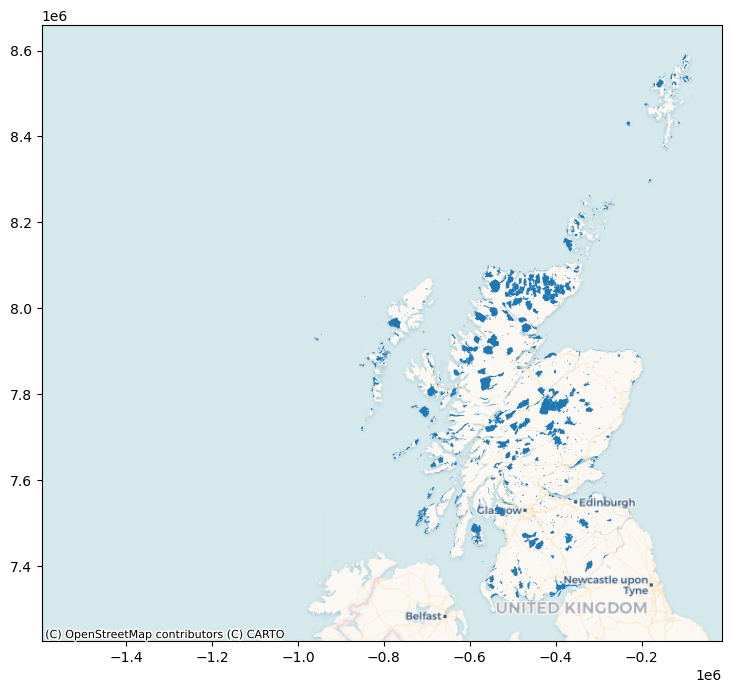

In [87]:
#Convert the CRS to ESPG:3857, making it compatable with online map visualisation tools and add a basemap to the geographic plots.
simd_cWebM = filtered_gdf2.to_crs("EPSG:3857")
simd_map = simd_cWebM.plot()
ctx.add_basemap(simd_map, source=ctx.providers.CartoDB.Voyager)

### Task 8: Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map.

I plotted the new GeoPanda DataFrame that only shows 'Shape_Area' over 100 on a choropleth map. I also plotted a 2x2 grid of choropleth maps, each illustrating different classification schemes. 

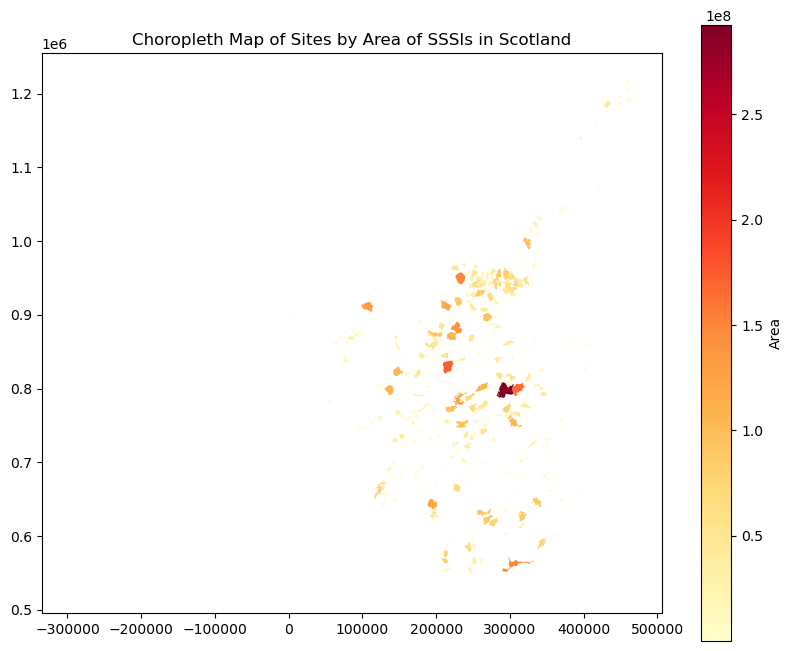

In [88]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(1, 1)

filtered_gdf2.plot(
    column='Shape_Area', 
    cmap="YlOrRd",  
    ax=ax,
    legend=True,
    legend_kwds={'label': "Area", 'orientation': "vertical"}
)

# Add titles and labels
ax.set_title('Choropleth Map of Sites by Area of SSSIs in Scotland')
plt.show()

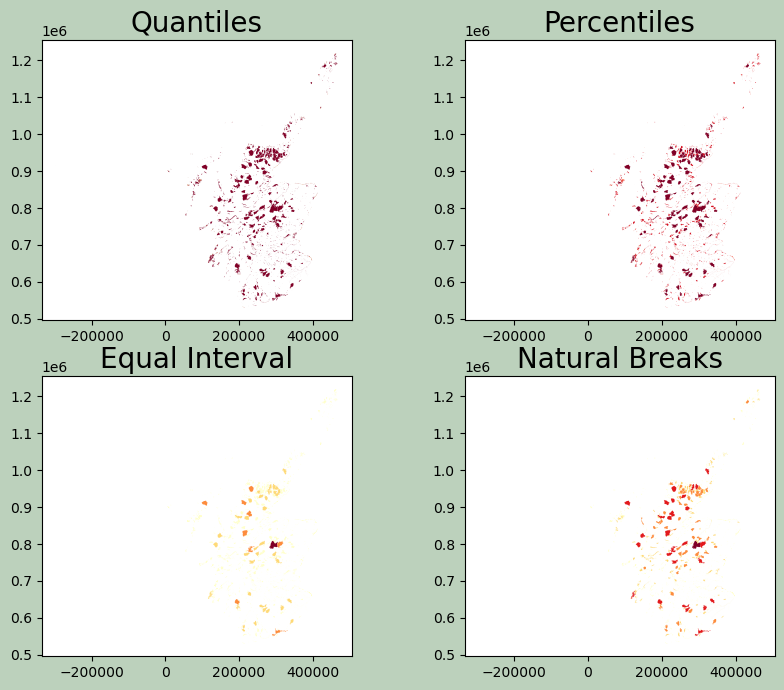

In [89]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)
filtered_gdf2.plot(column="Shape_Area", ax=ax[0,0], cmap="YlOrRd", scheme="Quantiles")
ax[0,0].set_title("Quantiles", fontsize=20, color="#000000")
filtered_gdf2.plot(column="Shape_Area", ax=ax[0,1], cmap="YlOrRd", scheme="Percentiles")
ax[0,1].set_title("Percentiles", fontsize=20, color="#000000")
filtered_gdf2.plot(column="Shape_Area", ax=ax[1,0], cmap="YlOrRd", scheme="EqualInterval")
ax[1,0].set_title("Equal Interval", fontsize=20, color="#000000")
filtered_gdf2.plot(column="Shape_Area", ax=ax[1,1], cmap="YlOrRd", scheme="NaturalBreaks")
ax[1,1].set_title("Natural Breaks", fontsize=20, color="#000000")
fig.patch.set_facecolor('#bcd1bc')
plt.show()

## Part 5: Python Rasterrio

### Import libraries. 

In [90]:
pip install earthpy rasterio

Note: you may need to restart the kernel to use updated packages.


In [91]:
#Import libraries with short names for quick reference in the code later. 
import rasterio as rio
import numpy as np
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Set the default plot size.
plt.rcParams['figure.figsize'] = [10, 8]

### Task 1: Read the file as a rasterio dataset. 

I read the file as a rasterio dataset and checked the Dataset. 

In [92]:
raster = rio.open('/arcgis/home/Assignment_2_data/elev.tif')
type(raster)

rasterio.io.DatasetReader

### Task 2: What is the CRS of the dataset? 

Using '.crs' I printed the CRS of the dataset. 

In [93]:
crs = raster.crs 
print(f"The CRS of the dataset is: {crs}")

The CRS of the dataset is: EPSG:32617


### Task 3: Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset. 

The raster extent (bounds) is defined by a bounding box with coordinates left at 479753.39945587853, bottom at 4170823.2037591375, right at 668843.3994558785, and top at 4347733.203759138, outlining a rectangular area that the dataset covers. The reference system is EPSG:32617, which is part of the WGS 84/UTM zone 17N, a widely used system for spatial referencing in a specific geographic region. This dataset only contains one band, indicating that it represents a single type of data, such as elevation or temperature, rather than a multi-band composition like RGB imagery. 

In [94]:
bounds = raster.bounds #Raster extent (bounds). 
num_bands = raster.count #Number of bands. 
crs = raster.crs #Reference system. 
width = raster.width #Raster width. 
height = raster.height #Raster height. 

print(f"Raster extent (bounds): {bounds}")
print(f"Reference system: {raster.crs}")
print(f"Number of bands in the dataset: {num_bands}")
print(f"Raster width is {width} and the height is {height}")

Raster extent (bounds): BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
Reference system: EPSG:32617
Number of bands in the dataset: 1
Raster width is 6303 and the height is 5897


### Task 4: Create a plot/map of the raster dataset 

I first read the raster datasets band into a variable named `elev_arr`. I then pronted the minimum and maximum values in the raster data to understand the range of values present in the dataset. I then plotted a histogram before data cleaning, this was used to visualise the distribution of data. I then replaced -32768 with 'NaN'. Another historgam was plotted to show the dataset after masking. Using the EarthPy's `plot_bands` function I created a visualisation of the masked raster data as a Digital Elevation Model (DEM). 

In [95]:
elev_arr = raster.read(1)
elev_arr

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

In [96]:
print("the minimum raster value is: ", elev_arr.min())
print("the maximum raster value is: ", elev_arr.max())

the minimum raster value is:  -32768
the maximum raster value is:  1490


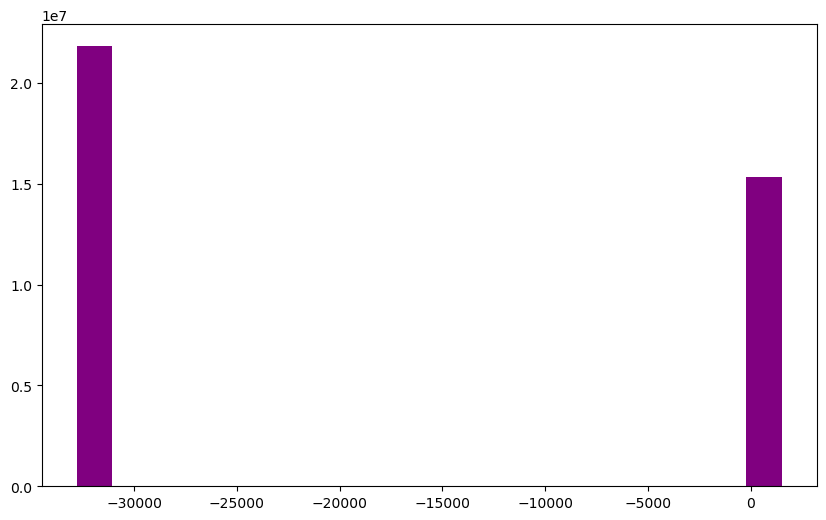

In [97]:
ep.hist(elev_arr,
        figsize=(10, 6))
plt.show()

In [98]:
elev_arr = elev_arr.astype('float')
elev_arr[elev_arr==-32768] = np.nan
elev_arr

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

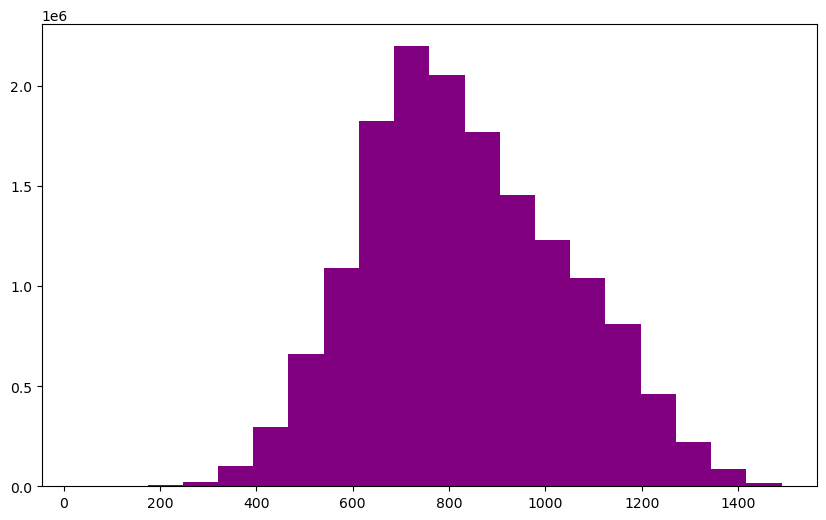

In [99]:
ep.hist(elev_arr,
        figsize=(10, 6))
plt.show()

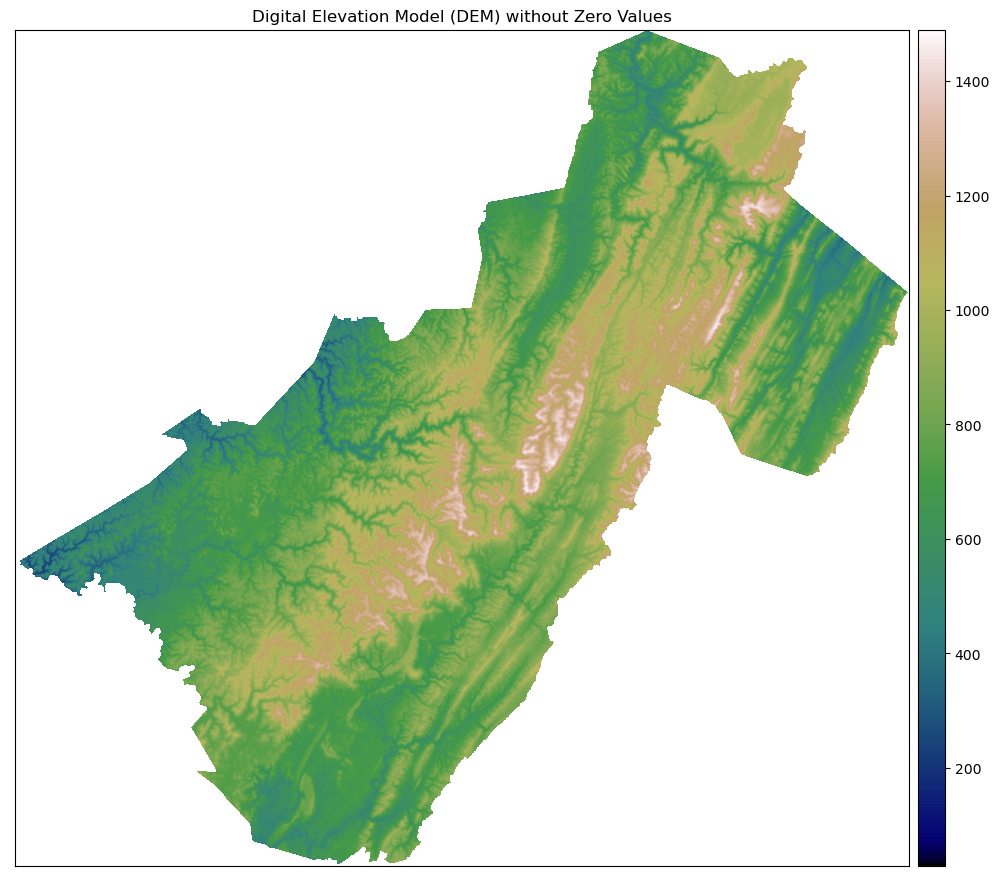

In [100]:
ep.plot_bands(elev_arr,
              title="Digital Elevation Model (DEM) without Zero Values",
              cmap="gist_earth")

plt.show()

### Task 5: Create Histogram from the raster. 

I plotted a histogram from the raster from the 'elev_arr' DataFrame, this removed (masked) the outliers which allowed the raster to be mapped properly. This used 50 bins which determined how the data range is divided and the histograms should not be stacked. Alpha=0.3 set the bars to 70% transparency and stepfilled means the bins for the historgam will be solid, creating a continous area. 

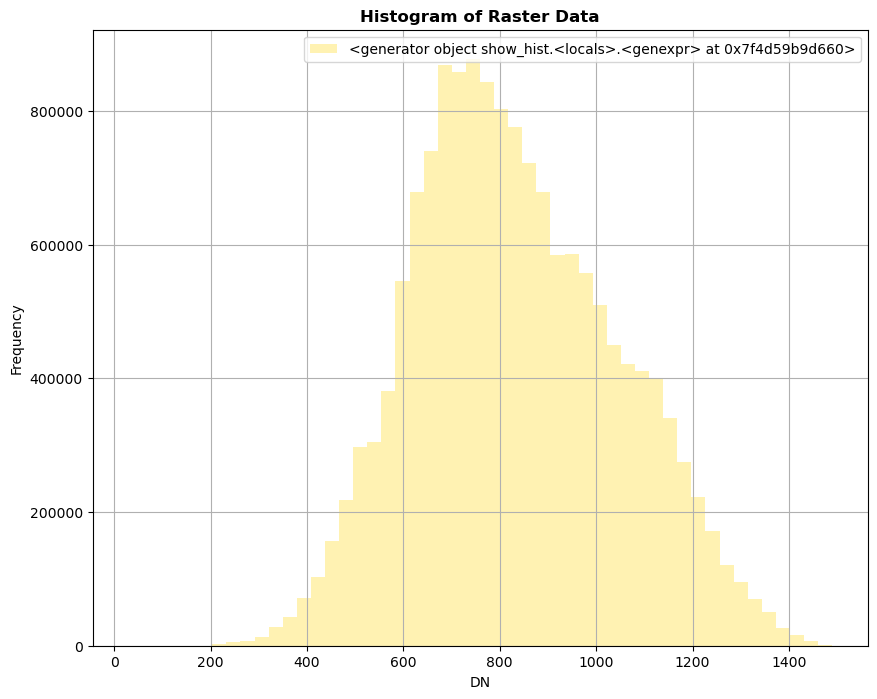

In [101]:
from rasterio.plot import show_hist
import matplotlib.pyplot as plt

show_hist(source=elev_arr, bins=50, lw=0.0, 
stacked=False, alpha=0.3, 
          histtype='stepfilled', title='Histogram of Raster Data') #Include title